## Import libraries and set max columns and rows for pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Read data that was downloaded from https://www.transtats.bts.gov/DataIndex.asp Airline On-Time Performance Data for October 2005

In [3]:
df = pd.read_csv('Desktop/pythonfiles/BTS_Data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2005_10.csv')

C:\Users\Family PC\AppData\Local\Temp\ipykernel_684\2089875527.py:1: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Desktop/pythonfiles/BTS_Data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2005_10.csv')


## Check data types to see if any conversions are necessary.. looks good

In [4]:
df.dtypes

Year                                 int64
Quarter                              int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
FlightDate                          object
Reporting_Airline                   object
DOT_ID_Reporting_Airline             int64
IATA_CODE_Reporting_Airline         object
Tail_Number                         object
Flight_Number_Reporting_Airline      int64
OriginAirportID                      int64
OriginAirportSeqID                   int64
OriginCityMarketID                   int64
Origin                              object
OriginCityName                      object
OriginState                         object
OriginStateFips                      int64
OriginStateName                     object
OriginWac                            int64
DestAirportID                        int64
DestAirportSeqID                     int64
DestCityMarketID                     int64
Dest       

## Check dataframe shape.. there are 592,712 rows and 110 columns

In [5]:
df.shape

(592712, 110)

## Let's just take a look at Airline and ArrDelay.  ArrDelay is the arrival delay minutes relative to the published and scheduled arrival time.  If 0, the flight was exactly ontime. If 10, 10 minutes late. If -10, 10 minutes early. 

In [6]:
df = df[['Reporting_Airline', 'ArrDelay']]

## Let's take a quick look at the data frame

In [7]:
df.head()

,Reporting_Airline,ArrDelay
0,AA,-11.0
1,AA,-16.0
2,AA,10.0
3,AA,17.0
4,AA,-6.0


## Let's take a quick look at the distribution of arrival delay minutes for all reporting airlines

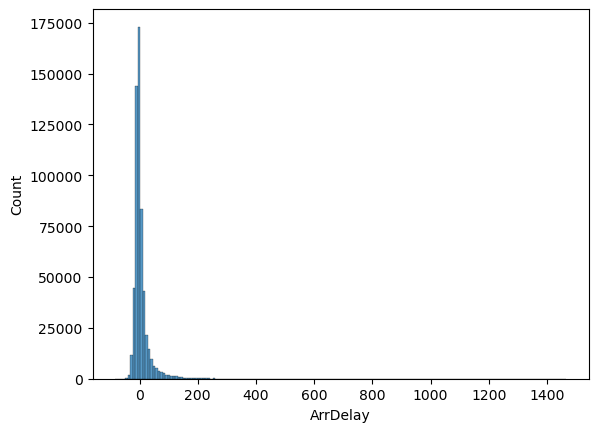

In [9]:
sns.histplot(data=df, x=df['ArrDelay'], bins=180)
plt.show()

## Let's look at which airlines are represented in the dataset

In [10]:
df.groupby('Reporting_Airline').count()

,ArrDelay
Reporting_Airline,
AA,53119
AS,13073
B6,9102
CO,24608
DH,9697
DL,49818
EV,25422
F9,6686
FL,16669


## Here, we're filtering the data to arrival delays between -40 and 40 minutes for AirTran (FL airline code)

In [11]:
dffl = df[(df['ArrDelay'] < 41) & (df['ArrDelay'] >-40) & (df['Reporting_Airline'] == 'FL')]

## Let's take a look at the counts by arrival delay minutes

In [12]:
dffl.groupby('ArrDelay').count()

,Reporting_Airline
ArrDelay,
-39.0,2
-38.0,3
-37.0,2
-36.0,5
-35.0,6
-34.0,8
-33.0,7
-32.0,9
-31.0,21


## Let's plot this in a histogram to see the distribution of this subset of AirTran delays

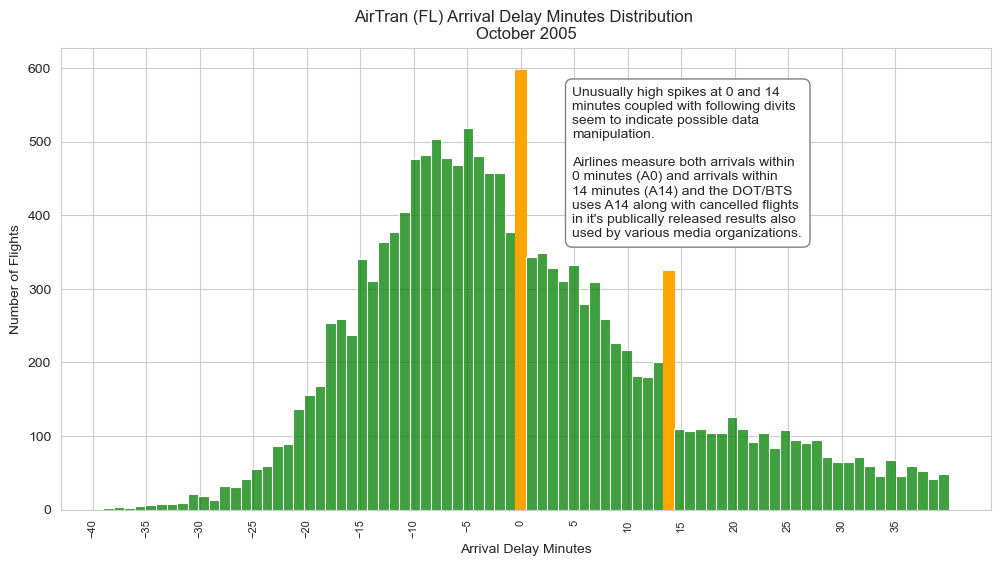

In [13]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.histplot(data=dffl, x="ArrDelay", bins=80, color='green')

plt.title('AirTran (FL) Arrival Delay Minutes Distribution \nOctober 2005')
plt.xlabel('Arrival Delay Minutes')
plt.ylabel('Number of Flights')
plt.xticks(range(-40, 40, 5), rotation=90, fontsize=8, ha='center')

# Annotate
plt.annotate("Unusually high spikes at 0 and 14 \nminutes coupled with following divits \nseem to indicate possible data \nmanipulation.\n\nAirlines measure both arrivals within \n0 minutes (A0) and arrivals within \n14 minutes (A14) and the DOT/BTS \nuses A14 along with cancelled flights \nin it's publically released results also \nused by various media organizations.",
             xy=(14, 200), xycoords='data',
             xytext=(0.55, 0.75), textcoords='axes fraction',
             size=10, ha="left", va="center",
             bbox=dict(boxstyle="round", fc="white", ec="gray", pad=0.5))

# Highlight bars
for i in [-1, 13]:
    plt.gca().get_children()[i+40].set_color('orange')
    
plt.show()